# Landslide Runout Model

In [1]:
##Importing Librarie
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

In [2]:
## For ignoring warnings to view clean output
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
## Importing the dataset
#df = pd.read_csv('runout_distance.csv',header=0)
xls = pd.ExcelFile('global_dataset.xlsx')
df = pd.read_excel(xls, sheet_name='Mixed landslides')

In [4]:
df.head(10)

,No.,Place,L(m),H(m),Hs(m),As(m²）,At(m²）,V(m³),Wsm(m),Wsa(m),Wa(m),Wm(m),θ(°),α(°),φ(°),β(°),reference
0,1,Cacao-Orosi volcano,16000,1408.0,NaN,NaN,NaN,2.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
1,2,Rincon de la Vieja volcano,8900,1095.0,NaN,NaN,NaN,4.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
2,3,Miravalles volcano,18700,2057.0,NaN,NaN,NaN,8.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
3,4,Tenono volcano,23500,1622.0,NaN,NaN,NaN,2.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
4,5,Irazu voleano(Prusiu),17000,2465.0,NaN,NaN,NaN,2.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
5,6,Turrialba volcano,14250,884.0,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
6,7,Santa Ana volcano,48000,1920.0,NaN,NaN,NaN,2.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
7,8,San Vicente volcano,24000,2160.0,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
8,9,Cordillera del Balsamo,800,158.0,NaN,NaN,NaN,2.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."
9,10,Cordillera del Balsamo-,440,85.0,NaN,NaN,NaN,8.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Devoli, G., De Blasio, F. V., Elverhøi, A., & ..."


In [5]:
#delete some invalid columns
cols_to_keep = ['L(m)','H(m)','V(m³)']#'As(m²）Wsm(m)',,'Wsa(m)','Hs(m)',,,,'As(m²）',,'θ(°)','β(°)'
df = df[cols_to_keep]
df_clean = df.dropna() # delete NAN rows
valid_rows = len(df_clean)
print(f"valid rows：{valid_rows}")

valid rows：251


In [6]:
#df_new = df_clean.copy()
#df_new['H_div_L'] = df_new['H(m)'] / (df_new['L(m)'] + 1e-6)
#cols_to_keep = ['H_div_L','V(m³)','As(m²）','θ(°)','β(°)']#',,,'Wsm(m)','Hs(m)''θ(°)''As(m²）',
#df_new = df_new[cols_to_keep]
#df_new = df_new.dropna() # delete NAN rows
#valid_sum = len(df_new)
#print(f"valid rows：{valid_sum}")

In [7]:
df_clean.head()
#df_new.head()

,L(m),H(m),V(m³)
0,16000,1408.0,2.000000e+09
1,8900,1095.0,4.000000e+08
2,18700,2057.0,8.000000e+09
3,23500,1622.0,2.000000e+09
4,17000,2465.0,2.000000e+09


In [8]:
df_clean.shape
#df_new.shape

(251, 3)

## Correlation

In [9]:
df_clean.corr()
#df_new.corr()

,L(m),H(m),V(m³)
L(m),1.000000,0.742123,0.562947
H(m),0.742123,1.000000,0.387867
V(m³),0.562947,0.387867,1.000000


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'L(m)'), Text(0, 1.5, 'H(m)'), Text(0, 2.5, 'V(m³)')])

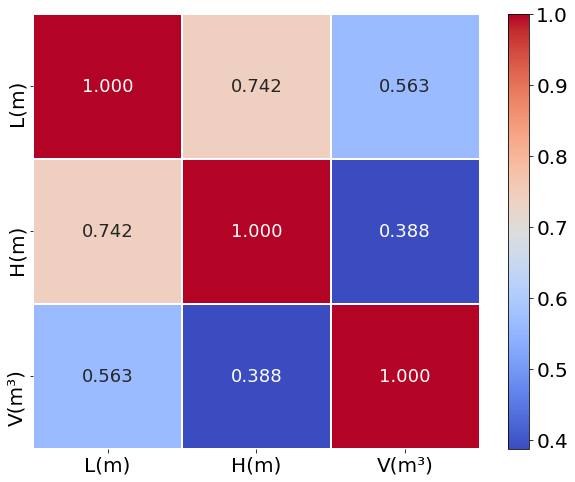

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_clean.corr()
#corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="coolwarm",annot_kws={'size': 18},fmt='.3f',linewidths=.5,cbar=False)
cb=g.figure.colorbar(g.collections[0])
cb.ax.tick_params(labelsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("heatmap.png",dpi=400)

### Separating Independent and Dependent feature

In [11]:
X = df_clean.iloc[:,1:]
y = df_clean.iloc[:, 0]
#X = df_new.iloc[:,1:]
#y = df_new.iloc[:, 0]

In [12]:
X.head()

,H(m),V(m³)
0,1408.0,2.000000e+09
1,1095.0,4.000000e+08
2,2057.0,8.000000e+09
3,1622.0,2.000000e+09
4,2465.0,2.000000e+09


In [13]:
X.shape

(251, 2)

In [14]:
print(min(y))
print(max(y))

20
50000


In [15]:
y.head()

0    16000
1     8900
2    18700
3    23500
4    17000
Name: L(m), dtype: int64

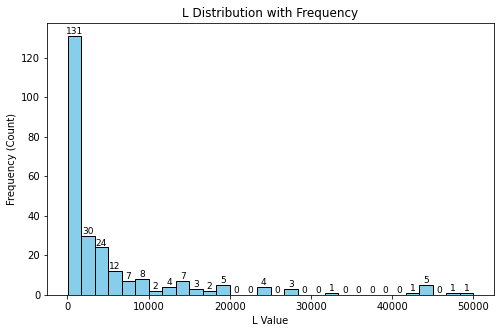

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(y, bins=30, color='skyblue', edgecolor='black')  # 绘制直方图

# 在每个柱子上标注频率
for i in range(len(n)):
    plt.text((bins[i]+bins[i+1])/2, n[i], int(n[i]), ha='center', va='bottom', fontsize=9)

plt.title("L Distribution with Frequency")
plt.xlabel("L Value")
plt.ylabel("Frequency (Count)")
plt.show()


In [17]:
y_log = np.log1p(y)

### Standardization 
Before building the model we need to standardize the features

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
## shows the wheather the features are in standardized format or not
print("Mean of the dataset:", np.mean(X).round(8))
print("Standard deviation of the dataset: ", np.std(X).round(8))

Mean of the dataset: -0.0
Standard deviation of the dataset:  1.0


### Splitting the dataset into training and testing set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

In [21]:
# print the shapes of our training and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 2)
(51, 2)
(200,)
(51,)


In [22]:
print(X_test)

[[-0.94600268 -0.24084228]
 [-0.96232953 -0.24069048]
 [-0.65337533 -0.24006527]
 [-0.83297066 -0.24084574]
 [-1.06280244 -0.24083111]
 [-0.58053247 -0.24082641]
 [-0.95228224 -0.24084699]
 [-0.08821521 -0.23984669]
 [ 0.10017149 -0.24082107]
 [-1.12810983 -0.2408496 ]
 [-0.3846103  -0.24083075]
 [ 0.35135377 -0.22678801]
 [-0.72873002 -0.23964579]
 [-0.7161709  -0.23281509]
 [-0.57299701 -0.24025653]
 [-0.26404281 -0.23740572]
 [ 0.35135377  0.36185723]
 [ 0.85371832  1.36637129]
 [-0.61569799 -0.2336187 ]
 [-0.50266597 -0.23945131]
 [-0.59560341 -0.24080399]
 [ 1.85844741 -0.23731532]
 [-0.5277842  -0.1403998 ]
 [-0.67849356 -0.24070981]
 [ 1.35608286  0.08059329]
 [-0.89199849 -0.24075405]
 [-0.95730589 -0.24077084]
 [ 0.60253604 -0.24082581]
 [ 0.72812718  0.56276004]
 [ 1.85844741 -0.23562773]
 [ 0.35135377 -0.23281509]
 [-0.68854085 -0.23988607]
 [-0.56797336 -0.24045944]
 [-0.06309699 -0.22879704]
 [-0.5277842  -0.12030952]
 [-0.87692756 -0.24006768]
 [-0.60439479 -0.24084228]
 

In [23]:
print(y_test)

153      420
122      202
92       825
158      521
149      100
162      806
152      313
83      1730
63      2000
144       26
155     1169
264     6000
108      700
187      750
116     1500
73      1829
211    11000
209    19000
178     1500
96       839
157      883
45     44000
271     1500
111      486
202    19000
90       803
8        800
55      3800
278     6200
37      9300
194     3250
76       593
110      542
262     3500
222     6500
137      547
166      524
5      14250
22      8200
126      700
118      800
12     42000
107      920
236    27000
89      1440
97      1107
200    12500
44     44000
64      7800
180     2400
71       347
Name: L(m), dtype: int64


In [24]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [25]:
import numpy as np
import pandas as pd

variables = {"X": X, "X_train": X_train, "X_test": X_test,
             "y_log": y_log, "y_train": y_train_log, "y_test_log": y_test_log,"y":y, "y_test": y_test}

for name, var in variables.items():
    if isinstance(var, np.ndarray):
        n_nan = np.isnan(var).sum()
    elif isinstance(var, (pd.Series, pd.DataFrame)):
        n_nan = var.isna().sum().sum()
    else:
        n_nan = 0
    print(f"{name}: {n_nan} NaN{'s' if n_nan!=1 else ''}")

X: 0 NaNs
X_train: 0 NaNs
X_test: 0 NaNs
y_log: 0 NaNs
y_train: 0 NaNs
y_test_log: 0 NaNs
y: 0 NaNs
y_test: 0 NaNs


In [26]:
use_log = True

if use_log:
    y_train_label = y_train_log
    y_test_label = y_test_log
    y_label = y_log
else:
    y_train_label = y_train
    y_test_label = y_test
    y_label = y

print("Using log-transformed labels" if use_log else "Using original labels")


Using log-transformed labels


### MLP

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [28]:
# 定义参数网格
param_grid = {
    "hidden_layer_sizes": [(k1, k2, k3) 
                           for k1 in range(5, 100, 10)
                           for k2 in range(5, 100, 10)
                           for k3 in range(5, 100, 10)],
    "alpha":[0.1]
}#(10,200,40)(0.01,0.1),(5,100,10)(0.1)

mlp = MLPRegressor(
    activation="relu",
    solver="adam",
    max_iter=1000,
    learning_rate="constant",
    early_stopping=True,
    n_iter_no_change=20, 
    random_state=1
)

mlp_grid_search = GridSearchCV(
    mlp,
    param_grid=param_grid,
    scoring="r2",
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    n_jobs=-1,
    verbose=2,
    return_train_score=True)

mlp_grid_search.fit(X_train, y_train_label)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    n_iter_no_change=20, random_state=1),
             n_jobs=-1,
             param_grid={'alpha': [0.1],
                         'hidden_layer_sizes': [(5, 5, 5), (5, 5, 15),
                                                (5, 5, 25), (5, 5, 35),
                                                (5, 5, 45), (5, 5, 55),
                                                (5, 5, 65), (5, 5, 75),
                                                (5, 5, 85), (5, 5, 95),
                                                (5, 15, 5), (5, 15, 15),
                                                (5, 15, 25), (5, 15, 35),
                                                (5, 15, 45), (5, 15, 55),
                                                (5, 15, 65), (5, 15, 75),
                                                (5, 15, 85), (5, 15, 95),
                                                (5, 25, 5), (5, 25, 15),
                                                (5, 25, 25), (5, 25, 35),
                                                (5, 25, 45), (5, 25, 55),
                                                (5, 25, 65), (5, 25, 75),
                                                (5, 25, 85), (5, 25, 95), ...]},
             return_train_score=True, scoring='r2', verbose=2)

In [29]:
# train 分数
best_idx = mlp_grid_search.best_index_
print("Best train score:", mlp_grid_search.cv_results_["mean_train_score"][best_idx])
mlp_cv_scores =mlp_grid_search.cv_results_["mean_test_score"][best_idx]
mlp_cv_std = mlp_grid_search.cv_results_["std_test_score"][best_idx]
print(f"Best valid score: {mlp_cv_scores:.5f} ± {mlp_cv_std:.5f}")

mlp_best_params = mlp_grid_search.best_params_
print("Best params:", mlp_best_params)

Best train score: 0.9083301214186215
Best valid score: 0.86954 ± 0.02038
Best params: {'alpha': 0.1, 'hidden_layer_sizes': (85, 75, 55)}


In [30]:
# 准备 OOF
kf = KFold(n_splits=5, shuffle=True, random_state=1)
folds = np.zeros_like(y_train_label, dtype=int)#为融合模型输出标准差
mlp_oof_preds = np.zeros(len(y_train_label),dtype=float)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, y_tr = X_train[train_idx], y_train_label.iloc[train_idx]
    X_val, y_val = X_train[val_idx], y_train_label.iloc[val_idx]
    
    folds[val_idx] = fold

    # 用最佳参数组合初始化模型
    mlp = MLPRegressor(
    activation="relu",
    solver="adam",
    max_iter=1000,
    learning_rate="constant",
    early_stopping=True,
    n_iter_no_change=20, 
    random_state=1,
    **mlp_best_params
    )
#     mlp = MLPRegressor(
#         activation="relu",
#         solver="adam",
#         max_iter=1000,
#         learning_rate="constant",
#         early_stopping=True,
#         n_iter_no_change=20, 
#         random_state=1,
#         alpha=0.1,
#         hidden_layer_sizes=(85,75,55)
#         )
    mlp.fit(X_tr, y_tr)

    # OOF 预测
    mlp_oof_preds[val_idx] = mlp.predict(X_val)
    
mlp_oof_r2 = r2_score(y_train_label, mlp_oof_preds)
print(mlp_oof_preds)
print(f"OOF r2: {mlp_oof_r2:.4f}")

[ 6.81965055  6.00496065  7.46318833  8.07400169  7.47211135  7.17994597
  6.89335237  3.97484939 10.04377959  7.5560014   6.20479455  9.77350563
  8.25778534  6.61029144  8.52385781  6.81801916  6.7277233   8.24904682
  7.24824234  9.72173784  9.50392843  6.92546196  9.44888011  9.98670729
  6.12104712  9.59177108  9.76111772  6.71814989  7.49591645  6.98240386
  8.10553847  6.74822915  6.12095966  6.06016416  5.80217918  6.94158786
  6.12622947 10.28994111  9.52834557  6.21981151  7.35398842  4.83650043
  7.39928381  8.42107914  8.10218965  6.85895426  6.4716005   4.12378728
  6.67688381  6.67635997  8.10556056  7.96844627  7.06567957  9.98763871
 10.18077233  6.83648444  6.89926661  7.48475942  6.618242    9.82131897
  7.06770144  7.60849338  8.46774008  5.49815588  9.7632593   8.19609268
  6.66771029  6.87420542  8.3310365   6.72830509  9.37662017  6.54713093
  9.94060129  4.37049397  7.27347698  6.48124378  8.29783268  3.92390473
  8.23976606  6.18724635  6.8624143   6.87674844  7

In [31]:
# predicting the values for x-test
# you can fine select parameter
mx = MLPRegressor( **mlp_best_params, activation='relu',solver='adam',n_iter_no_change=20, 
                   max_iter=1000,learning_rate='constant',random_state=1) 
# mx = MLPRegressor( hidden_layer_sizes=(85,75,55),alpha=0.1,activation='relu',solver='adam',n_iter_no_change=20, 
#                    max_iter=1000,learning_rate='constant',random_state=1)
mx.fit(X_train, y_train_label)
mlp_predictions=mx.predict(X_test)
#mlp_predictions = np.expm1(mlp_predictions_log)

In [32]:
print(mlp_predictions)

[ 6.05852167  6.00640985  6.69207641  6.43789515  5.15796609  6.76709241
  6.03735848  7.54148942  7.7820857   3.74893019  7.00403456  8.20975239
  6.61650587  6.74798387  6.7860209   7.24590988  9.51084217  9.38642121
  6.84865642  6.88496848  6.7492464   9.81086689  7.97366673  6.65059172
  9.81131593  6.24137395  6.02184671  8.14486621  9.67212167  9.82338253
  8.12517157  6.65371717  6.78860444  7.77691253  8.03545468  6.30415252
  6.73795169  9.24975105  8.39255099  6.60319449  5.83631902 10.39459922
  6.65809021 10.0515671   6.83488484  6.98657381  9.17154395  9.8621214
  9.79780112  7.07530973  6.39320101]


In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_label, mlp_predictions))
print('MSE:', metrics.mean_squared_error(y_test_label, mlp_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_label, mlp_predictions)))
mlp_test_r2 = metrics.r2_score(y_test_label, mlp_predictions)
print("r2:", mlp_test_r2)

MAE: 0.3670678813144599
MSE: 0.20963354645982896
RMSE: 0.45785756132210914
r2: 0.9168277795823819


In [34]:
mx.score(X,y_label)

0.9202585095945863

In [35]:
#检验训练数据拟合程度
pred_mlp_train = mx.predict(X_train)

In [36]:
mlp_mae_train=metrics.mean_absolute_error(y_train_label, pred_mlp_train)
mlp_mse_train=metrics.mean_squared_error(y_train_label, pred_mlp_train)
mlp_rmse_train=np.sqrt(metrics.mean_squared_error(y_train_label, pred_mlp_train))
R2_mlp_train=metrics.r2_score(y_train_label,pred_mlp_train)

In [37]:
print('MAE:', mlp_mae_train)
print('MSE:', mlp_mse_train)
print('RMSE:', mlp_rmse_train)
print('R2:',R2_mlp_train)

MAE: 0.32989221834964405
MSE: 0.18912289084358716
RMSE: 0.43488261731596856
R2: 0.9211774626829417


### Model Building with Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
import time
from sklearn.metrics import r2_score

RF = RandomForestRegressor(random_state=1)

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 100,num = 20)]#(5,100,20),(25,500,20)
max_depth = [1,3]#1,3,5,7(1,3)
min_samples_leaf = [5,10]#(1,5,10)(5,10)
max_features = ['sqrt',1.0]
random_params_group = {'n_estimators':n_estimators,
                      'max_depth':max_depth,
                      'max_features':max_features,
                      'min_samples_leaf':min_samples_leaf}
random_model =RandomizedSearchCV(RF,param_distributions = random_params_group,n_iter = 100,
scoring = 'r2',verbose = 2,n_jobs = -1,cv = KFold(n_splits=5, shuffle=True, random_state=1),
                                 random_state = 1,return_train_score=True)
# 使用该模型训练数据
random_model.fit(X_train, y_train_label)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestRegressor(random_state=1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3],
                                        'max_features': ['sqrt', 1.0],
                                        'min_samples_leaf': [5, 10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95, 100]},
                   random_state=1, return_train_score=True, scoring='r2',
                   verbose=2)

In [40]:
RF_best_params = random_model.best_params_
print("Best params:", RF_best_params)

best_idx = random_model.best_index_
print("Best train score:", random_model.cv_results_['mean_train_score'][best_idx])
RF_cv_scores =random_model.cv_results_['mean_test_score'][best_idx]
RF_cv_std = random_model.cv_results_["std_test_score"][best_idx]
print(f"Best valid score: {RF_cv_scores:.5f} ± {RF_cv_std:.5f}")

Best params: {'n_estimators': 80, 'min_samples_leaf': 5, 'max_features': 1.0, 'max_depth': 3}
Best train score: 0.9192088469166562
Best valid score: 0.88393 ± 0.02089


In [41]:
# 准备 OOF
kf = KFold(n_splits=5, shuffle=True, random_state=1)
RF_oof_preds = np.zeros(len(y_train_label),dtype=float)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, y_tr = X_train[train_idx], y_train_label.iloc[train_idx]
    X_val, y_val = X_train[val_idx], y_train_label.iloc[val_idx]

    # 用最佳参数组合初始化模型
    RF_model=RandomForestRegressor(**RF_best_params,random_state=1)
    #RF_model=RandomForestRegressor(n_estimators =80,max_depth =3,min_samples_leaf =5,max_features =1,random_state=1)
    RF_model.fit(X_tr, y_tr)

    # OOF 预测
    RF_oof_preds[val_idx] = RF_model.predict(X_val)
    
RF_oof_r2 = r2_score(y_train_label, RF_oof_preds)
print(f"OOF r2: {RF_oof_r2:.4f}")

OOF r2: 0.8882


In [42]:
start_time = time.time()
RF=RandomForestRegressor(**RF_best_params,random_state=1)
#RF_model=RandomForestRegressor(n_estimators =80,max_depth =3,min_samples_leaf =5,max_features =1,random_state=1)
# feeding the training data into the model
RF.fit(X_train, y_train_label)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.18401050567626953 sec


In [43]:
# predicting the values for x-test
RF_predictions=RF.predict(X_test)

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_label, RF_predictions))
print('MSE:', metrics.mean_squared_error(y_test_label, RF_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_label, RF_predictions)))
RF_test_r2 = metrics.r2_score(y_test_label, RF_predictions)
print("r2:", RF_test_r2)

MAE: 0.48291308699071644
MSE: 0.4657857086139148
RMSE: 0.6824849511995958
r2: 0.8151992737878115


In [45]:
pred_rf_train=RF.predict(X_train)

In [46]:
rf_mae_train=metrics.mean_absolute_error(y_train_label, pred_rf_train)
rf_mse_train=metrics.mean_squared_error(y_train_label, pred_rf_train)
rf_rmse_train=np.sqrt(metrics.mean_squared_error(y_train_label, pred_rf_train))
R2_rf_train=metrics.r2_score(y_train_label,pred_rf_train)

In [47]:
print('MAE:', rf_mae_train)
print('MSE:', rf_mse_train)
print('RMSE:', rf_rmse_train)
print('R2:',R2_rf_train)

MAE: 0.3447343015049261
MSE: 0.19189692186353458
RMSE: 0.43806040892043024
R2: 0.9200213035177915


In [48]:
RF.score(X,y_label)

0.8978748161420048

In [49]:
# 计算特征重要性
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [50]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.809799)
2. feature 1 (0.190201)


### XGB

In [53]:
pip install xgboost 

^C
Note: you may need to restart the kernel to use updated packages.


In [51]:
import xgboost as xgb
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

xgb_reg = xgb.XGBRegressor(random_state=1)

In [52]:
param_grid = [
{'n_estimators': [20,50,100],'max_depth': [1,3],'min_child_weight':[5,10],'learning_rate': [0.05,0.1,0.2],'reg_alpha':[5,10,15]} ]
#(50,100,300,500) (1,3,5,7) (1,5,8) (0.05,0.1,0.2) (1,5,10,15) #(20,50,100)(1,3)(5,10)(0.05,0.1,0.2)(5,10,15)

xgb_grid_search = GridSearchCV(xgb_reg, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=1),
                          scoring='r2',return_train_score=True)
 
xgb_grid_search.fit(X_train, y_train_label)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             param_grid=[{'learning_rate': [0.05, 0.1, 0.2],
                          'max_depth': [1, 3], 'min_child_weight': [5, 10],
                          'n_estimators': [20, 50, 100],
                          'reg_alpha': [5, 10, 15]}],
             return_train_score=True, scoring='r2')

In [53]:
xgb_best_params = xgb_grid_search.best_params_
print("Best params:", xgb_best_params)

best_idx = xgb_grid_search.best_index_
print("Best train score:", xgb_grid_search.cv_results_['mean_train_score'][best_idx])
xgb_grid_search_cv_scores =xgb_grid_search.cv_results_['mean_test_score'][best_idx]
xgb_grid_search_cv_std = xgb_grid_search.cv_results_["std_test_score"][best_idx]
print(f"Best valid score: {xgb_grid_search_cv_scores:.5f} ± {xgb_grid_search_cv_std:.5f}")

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 5}
Best train score: 0.9236549109779444
Best valid score: 0.87895 ± 0.02212


In [54]:
# 准备 OOF
kf = KFold(n_splits=5, shuffle=True, random_state=1)
xgb_oof_preds = np.zeros(len(y_train_label),dtype=float)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, y_tr = X_train[train_idx], y_train_label.iloc[train_idx]
    X_val, y_val = X_train[val_idx], y_train_label.iloc[val_idx]

    # 用最佳参数组合初始化模型
    xgb_model = xgb.XGBRegressor(random_state=1,**xgb_best_params)
    #xgb_model = xgb.XGBRegressor(random_state=1,n_estimators=100,max_depth=3,learning_rate=0.2,min_child_weight=5,reg_alpha=5)
    xgb_model.fit(X_tr, y_tr)

    # OOF 预测
    xgb_oof_preds[val_idx] = xgb_model.predict(X_val)
    
xgb_oof_r2 = r2_score(y_train_label, xgb_oof_preds)
print(f"OOF r2: {xgb_oof_r2:.4f}")

OOF r2: 0.8834


In [55]:
start_time = time.time()
Xgb = xgb.XGBRegressor(random_state=1,**xgb_best_params)
#Xgb = xgb.XGBRegressor(random_state=1,n_estimators=100,max_depth=3,learning_rate=0.2,min_child_weight=5,reg_alpha=5)
Xgb.fit(X_train, y_train_label) 
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.059003353118896484 sec


In [56]:
xgb_pred=Xgb.predict(X_test)

In [57]:
print(xgb_pred)

[5.6242433 5.7128487 6.489319  5.952239  5.2812586 6.726469  5.6237564
 7.636448  7.859342  4.2606516 6.726469  9.009414  6.686559  6.999922
 6.723402  7.4289207 9.3043    9.425185  7.0902934 7.0104556 6.726469
 8.636323  7.671769  6.4412427 9.74329   5.9618816 5.7128487 8.054504
 9.425185  8.652107  8.077822  6.5998683 6.723402  7.8015256 7.671769
 6.1816564 6.6630244 9.153998  8.311382  6.835918  6.6217995 9.748728
 6.686559  9.831209  6.723402  6.723402  9.334199  8.758765  8.464923
 7.5778065 6.292206 ]


In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_label, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test_label, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_label, xgb_pred)))
R2_Xgb=metrics.r2_score(y_test_label,xgb_pred)
print('r2:',R2_Xgb)

MAE: 0.42669458437670027
MSE: 0.3479771926032411
RMSE: 0.5898959167541686
r2: 0.8619398648152589


In [59]:
Xgb.score(X_train,y_train_label)

0.9278873676078216

In [60]:
Xgb.score(X_test,y_test_label)

0.8619398648152589

In [61]:
pred_Xgb=Xgb.predict(X)

In [62]:
Xgb_mae=metrics.mean_absolute_error(y_label, pred_Xgb)
Xgb_mse=metrics.mean_squared_error(y_label, pred_Xgb)
Xgb_rmse=np.sqrt(metrics.mean_squared_error(y_label, pred_Xgb))
R2_Xgb=metrics.r2_score(y_label,pred_Xgb)

In [63]:
print('MAE:', Xgb_mae)
print('MSE:', Xgb_mse)
print('RMSE:', Xgb_rmse)
print('R2:',R2_Xgb)

MAE: 0.336812797693224
MSE: 0.20857184184632446
RMSE: 0.4566966628368599
R2: 0.9139541850382623


In [64]:
importance_gain = Xgb.get_booster().get_score(importance_type='gain')
print("Gain:", importance_gain)

Gain: {'f0': 5.950634479522705, 'f1': 2.713705539703369}


### 支持向量机回归

In [65]:
#SVM构建
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

svr = SVR(kernel='rbf')

In [66]:
 param_grid = {
    'epsilon': [0.1, 0.5],
    'C': [0.1, 1],
    'gamma': [0.01, 0.1]
}#(0.01,0.1,0.5)(0.1,1,10)(0.01,0.1,0.5) #(0.1,0.5)(0.1,1)(0.01,0.1)

svr_grid = GridSearchCV(svr, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=1), 
                    scoring='r2',return_train_score=True)
svr_grid.fit(X_train, y_train_label)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.1, 1], 'epsilon': [0.1, 0.5],
                         'gamma': [0.01, 0.1]},
             return_train_score=True, scoring='r2')

In [67]:
svr_best_params = svr_grid.best_params_
print("Best params:", svr_best_params)

best_idx = svr_grid.best_index_
print("Best train score:", svr_grid.cv_results_['mean_train_score'][best_idx])
svr_cv_scores =svr_grid.cv_results_['mean_test_score'][best_idx]
svr_cv_std = svr_grid.cv_results_["std_test_score"][best_idx]
print(f"Best valid score: {svr_cv_scores:.5f} ± {svr_cv_std:.5f}")

Best params: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Best train score: 0.7534752944360765
Best valid score: 0.73185 ± 0.02756


In [68]:
# 准备 OOF
kf = KFold(n_splits=5, shuffle=True, random_state=1)
svr_oof_preds = np.zeros(len(y_train_label),dtype=float)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, y_tr = X_train[train_idx], y_train_label.iloc[train_idx]
    X_val, y_val = X_train[val_idx], y_train_label.iloc[val_idx]

    # 用最佳参数组合初始化模型
    SVR_model = SVR(kernel= "rbf",**svr_best_params)
    #SVR_model = SVR(kernel= "rbf",epsilon=0.1,C=1,gamma=0.1)
    SVR_model.fit(X_tr, y_tr)

    # OOF 预测
    svr_oof_preds[val_idx] = SVR_model.predict(X_val)
    
svr_oof_r2 = r2_score(y_train_label, svr_oof_preds)
print(f"OOF r2: {svr_oof_r2:.5f}")

OOF r2: 0.73801


In [69]:
svr_model = SVR(kernel= "rbf",**svr_best_params)
#svr_model = SVR(kernel= "rbf",epsilon=0.1,C=1,gamma=0.1)

In [70]:
svr_model.fit(X_train,y_train_label)

SVR(C=1, gamma=0.1)

In [71]:
# predicting the values for x-test
svr_pred=svr_model.predict(X_test)

In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_label, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test_label, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_label, svr_pred)))
svr_test_r2 = metrics.r2_score(y_test_label, svr_pred)
print("r2:", svr_test_r2)

MAE: 0.501956464414759
MSE: 0.5544342008212464
RMSE: 0.7446033849112199
r2: 0.7800279376249205


In [73]:
svr_model.score(X,y_label)

0.7637174751042506

In [74]:
y_pred=svr_model.predict(X_test)

In [75]:
pred_svr_train=svr_model.predict(X_train)

In [76]:
svr_mae_train=metrics.mean_absolute_error(y_train_label, pred_svr_train)
svr_mse_train=metrics.mean_squared_error(y_train_label, pred_svr_train)
svr_rmse_train=np.sqrt(metrics.mean_squared_error(y_train_label, pred_svr_train))
R2_svr_train=metrics.r2_score(y_train_label,pred_svr_train)

In [77]:
print('MAE:', svr_mae_train)
print('MSE:', svr_mse_train)
print('RMSE:', svr_rmse_train)
print('R2:',R2_svr_train)

MAE: 0.5416435575320311
MSE: 0.577407998515982
RMSE: 0.7598736727351343
R2: 0.7593482031329829


## TabNet

In [63]:
pip install pytorch-tabnet

Looking in indexes: http://mirrors.aliyun.com/pypi/simple, http://mirrors.aliyun.com/pypi/simpleNote: you may need to restart the kernel to use updated packages.



In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import random
import torch.nn.functional as F
from sklearn.metrics import r2_score

# --------------------------
# 1️⃣ 固定随机性
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# 5折 CV
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

In [79]:
# --------------------------
#  TabNet 网格搜索 + 五折 CV
tabnet_param_grid = {
    'n_d': [8,16],
    'n_a': [8,16],
    'n_steps': [3,5]
}

best_tabnet_score = -float('inf')
best_tabnet_params = None

print("=== TabNet Grid Search ===")
for n_d in tabnet_param_grid['n_d']:
    for n_a in tabnet_param_grid['n_a']:
        for n_steps in tabnet_param_grid['n_steps']:
            fold_train_scores = []
            fold_valid_scores = []

            for train_idx, val_idx in kf.split(X_train):
                X_tr, X_val = X_train[train_idx], X_train[val_idx]
                y_tr = y_train_label.iloc[train_idx].values.reshape(-1, 1)
                y_val = y_train_label.iloc[val_idx].values.reshape(-1, 1)

                model = TabNetRegressor(
                    n_d=n_d, n_a=n_a, n_steps=n_steps,
                    gamma=1.3, mask_type='sparsemax',
                    verbose=0, seed=seed
                )

                model.fit(
                    X_tr, y_tr,
                    eval_set=[(X_val, y_val)],
                    eval_metric=['mse'],
                    loss_fn=F.mse_loss,
                    max_epochs=200,
                    patience=20,
                    batch_size=32,
                    virtual_batch_size=16
                )

                y_tr_pred = model.predict(X_tr)
                y_val_pred = model.predict(X_val)

                fold_train_scores.append(r2_score(y_tr, y_tr_pred))
                fold_valid_scores.append(r2_score(y_val, y_val_pred))

            mean_train = np.mean(fold_train_scores)
            std_train = np.std(fold_train_scores, ddof=1)  # ddof=1 计算样本标准差
            mean_valid = np.mean(fold_valid_scores)
            std_valid = np.std(fold_valid_scores, ddof=1)
            print(
                f"n_d={n_d}, n_a={n_a}, n_steps={n_steps} | "
                f"Train R²={mean_train:.=5f} ± {std_train:.5f}, "
                f"Valid R²={mean_valid:.5f} ± {std_valid:.5f}"
                )

            if mean_valid > best_tabnet_score:
                best_tabnet_score = mean_valid
                best_tabnet_params = (n_d, n_a, n_steps)

print("Best TabNet params:", best_tabnet_params)
print("Best TabNet Valid R² (CV):", best_tabnet_score)

=== TabNet Grid Search ===

Early stopping occurred at epoch 57 with best_epoch = 37 and best_val_0_mse = 0.44706


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 56 with best_epoch = 36 and best_val_0_mse = 0.28611


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 33 with best_epoch = 13 and best_val_0_mse = 0.58107


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 82 with best_epoch = 62 and best_val_0_mse = 0.36702


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 46 with best_epoch = 26 and best_val_0_mse = 0.4605
n_d=8, n_a=8, n_steps=3 | Train R²=0.766210 ± 0.12710, Valid R²=0.81784 ± 0.04219


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 41 with best_epoch = 21 and best_val_0_mse = 0.44277


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 38 with best_epoch = 18 and best_val_0_mse = 0.46777


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 53 with best_epoch = 33 and best_val_0_mse = 0.43819


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_mse = 0.49514


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 56 with best_epoch = 36 and best_val_0_mse = 0.6126


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


n_d=8, n_a=8, n_steps=5 | Train R²=0.451519 ± 0.32127, Valid R²=0.78553 ± 0.05589

Early stopping occurred at epoch 60 with best_epoch = 40 and best_val_0_mse = 0.38373


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 35 with best_epoch = 15 and best_val_0_mse = 0.34126


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 58 with best_epoch = 38 and best_val_0_mse = 0.51414


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 40 with best_epoch = 20 and best_val_0_mse = 0.38243


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 104 with best_epoch = 84 and best_val_0_mse = 0.37978
n_d=8, n_a=16, n_steps=3 | Train R²=0.820567 ± 0.04323, Valid R²=0.82715 ± 0.03688

E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)




Early stopping occurred at epoch 36 with best_epoch = 16 and best_val_0_mse = 0.42891


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_0_mse = 0.40704


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 34 with best_epoch = 14 and best_val_0_mse = 0.55333


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_0_mse = 0.38761


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_mse = 0.63662


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


n_d=8, n_a=16, n_steps=5 | Train R²=0.707552 ± 0.12175, Valid R²=0.79004 ± 0.05945

Early stopping occurred at epoch 65 with best_epoch = 45 and best_val_0_mse = 0.38271


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 50 with best_epoch = 30 and best_val_0_mse = 0.34907


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 34 with best_epoch = 14 and best_val_0_mse = 0.61896


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 57 with best_epoch = 37 and best_val_0_mse = 0.29415


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 37 with best_epoch = 17 and best_val_0_mse = 0.42624
n_d=16, n_a=8, n_steps=3 | Train R²=0.764833 ± 0.05226, Valid R²=0.82002 ± 0.06031


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 33 with best_epoch = 13 and best_val_0_mse = 0.77646


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 41 with best_epoch = 21 and best_val_0_mse = 0.39551


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 46 with best_epoch = 26 and best_val_0_mse = 0.50228


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 39 with best_epoch = 19 and best_val_0_mse = 0.33532


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 50 with best_epoch = 30 and best_val_0_mse = 0.46239


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


n_d=16, n_a=8, n_steps=5 | Train R²=0.748191 ± 0.05191, Valid R²=0.79069 ± 0.05352

Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_mse = 0.67978


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 65 with best_epoch = 45 and best_val_0_mse = 0.34554


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 39 with best_epoch = 19 and best_val_0_mse = 0.53026


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 57 with best_epoch = 37 and best_val_0_mse = 0.6018


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_mse = 0.3789
n_d=16, n_a=16, n_steps=3 | Train R²=0.736928 ± 0.19217, Valid R²=0.78830 ± 0.02803


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 84 with best_epoch = 64 and best_val_0_mse = 0.45704


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 38 with best_epoch = 18 and best_val_0_mse = 0.38788


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 43 with best_epoch = 23 and best_val_0_mse = 0.64076


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_mse = 0.34245


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 45 with best_epoch = 25 and best_val_0_mse = 0.48027


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


n_d=16, n_a=16, n_steps=5 | Train R²=0.771609 ± 0.05386, Valid R²=0.80002 ± 0.05683
Best TabNet params: (8, 16, 3)
Best TabNet Valid R² (CV): 0.8271536786716347


In [80]:
n_d_best, n_a_best, n_steps_best = best_tabnet_params
#n_d_best, n_a_best, n_steps_best = (16,8,5)
tabnet_oof_preds = np.zeros_like(y_train_label.values, dtype=float)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"OOF Fold {fold+1}")
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr = y_train_label.iloc[train_idx].values.reshape(-1, 1)
    y_val = y_train_label.iloc[val_idx].values.reshape(-1, 1)

    model = TabNetRegressor(
        n_d=n_d_best, n_a=n_a_best, n_steps=n_steps_best,
        gamma=1.3, mask_type='sparsemax',
        verbose=0, seed=seed
    )

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric=['mse'],
        loss_fn=F.mse_loss,
        max_epochs=200,
        patience=20,
        batch_size=32,
        virtual_batch_size=16
    )

    tabnet_oof_preds[val_idx] = model.predict(X_val).flatten()

# 计算 OOF R²
oof_r2 = r2_score(y_train_label, tabnet_oof_preds)
print(f"TabNet OOF R²: {oof_r2:.5f}")

OOF Fold 1

Early stopping occurred at epoch 60 with best_epoch = 40 and best_val_0_mse = 0.38373
OOF Fold 2


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 35 with best_epoch = 15 and best_val_0_mse = 0.34126
OOF Fold 3


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 58 with best_epoch = 38 and best_val_0_mse = 0.51414
OOF Fold 4


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 40 with best_epoch = 20 and best_val_0_mse = 0.38243
OOF Fold 5


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 104 with best_epoch = 84 and best_val_0_mse = 0.37978
TabNet OOF R²: 0.83318


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [81]:
from sklearn.metrics import r2_score

# --------------------------
# TabNet 最终训练 + 测试集预测
best_n_d, best_n_a, best_n_steps = best_tabnet_params
#best_n_d, best_n_a, best_n_steps =(16,8,5)
final_tabnet = TabNetRegressor(
    n_d=best_n_d, n_a=best_n_a, n_steps=best_n_steps,
    gamma=1.3, mask_type='sparsemax',
    verbose=0, seed=seed
)

y_train_Tab = y_train_label.values.reshape(-1, 1)
y_test_Tab = y_test_label.values.reshape(-1, 1)
final_tabnet.fit(
    X_train, y_train_Tab,
    eval_set=[(X_test, y_test_Tab)],
    eval_metric=['mse'],
    loss_fn=F.mse_loss,
    max_epochs=200,
    patience=20,
    batch_size=32,
    virtual_batch_size=16
)

y_test_pred_tabnet = final_tabnet.predict(X_test)
r2_tabnet = r2_score(y_test_label, y_test_pred_tabnet)
print(f"TabNet Test R²: {r2_tabnet:.5f}")

y_pred_tabnet = final_tabnet.predict(X)
r2_tabnet = r2_score(y_label, y_pred_tabnet)
print(f"TabNet all data R²: {r2_tabnet:.5f}")


Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_mse = 0.39564
TabNet Test R²: 0.84303


E:\anaconda\conda\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet all data R²: 0.73496


## FT-Transformer

In [35]:
pip install pytorch-tabular

Looking in indexes: http://mirrors.aliyun.com/pypi/simple, http://mirrors.aliyun.com/pypi/simpleNote: you may need to restart the kernel to use updated packages.



  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.3.8
    Uninstalling pytorch-lightning-1.3.8:
      Successfully uninstalled pytorch-lightning-1.3.8


In [82]:
import torch
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig,OptimizerConfig
from pytorch_tabular.models.ft_transformer.config import FTTransformerConfig
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import logging
logging.disable(logging.CRITICAL)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # 忽略所有 UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)  # 忽略 FutureWarning

In [83]:
# ========================
# 参数搜索范围（小数据集合理配置）
# ========================
ft_param_grid = {
    "input_embed_dim": [16,32],
    "num_heads": [2,4],
    "num_attn_blocks": [2,3],
    "attn_dropout": [0.0],
    "ff_dropout": [0.0]
}

kf = KFold(n_splits=5, shuffle=True, random_state=1)

ft_best_score = -float("inf")
best_params = None

# ========================
# 网格搜索
# ========================
for d_token in ft_param_grid["input_embed_dim"]:
    for n_heads in ft_param_grid["num_heads"]:
        for n_blocks in ft_param_grid["num_attn_blocks"]:
            for attn_dp in ft_param_grid["attn_dropout"]:
                for ff_dp in ft_param_grid["ff_dropout"]:
                    
                    fold_train_scores = []
                    fold_valid_scores = []

                    for train_idx, val_idx in kf.split(X_train):
                        # 取出本折数据
                        X_tr, X_val = X_train[train_idx], X_train[val_idx]
                        y_tr, y_val = y_train_label.iloc[train_idx], y_train_label.iloc[val_idx]     
                        
                        
                        # 转换成 DataFrame
                        df_tr = pd.DataFrame(X_tr, columns=[f'feat{i}' for i in range(X_train.shape[1])])
                        df_tr['target'] = y_tr.values
                        df_val = pd.DataFrame(X_val, columns=[f'feat{i}' for i in range(X_train.shape[1])])
                        df_val['target'] = y_val.values
                        
                        # 配置
                        data_config = DataConfig(
                            target=['target'], 
                            continuous_cols=[f'feat{i}' for i in range(X_train.shape[1])]
                        )
                        model_config = FTTransformerConfig(
                            task="regression",
                            metrics=["mean_squared_error"],
                            input_embed_dim=d_token,
                            num_heads=n_heads,
                            num_attn_blocks=n_blocks,
                            attn_dropout=attn_dp,
                            ff_dropout=ff_dp,
                            seed=1
                        )
                        
                        optimizer_config = OptimizerConfig()
                        
                        trainer_config = TrainerConfig(
                            max_epochs=200, 
                            batch_size=32,
                            early_stopping="valid_loss",
                            early_stopping_patience=20,
                            track_grad_norm=-1,
                            profiler=None,
                            precision=16,
                            seed=1,
                            progress_bar='none',
                            check_val_every_n_epoch=5,
                            trainer_kwargs={
                                "enable_model_summary": False,  # 训练开始时不打印模型 summary
                                "log_every_n_steps": 0          # 控制日志频率（旧版 Lightning 可能不同）
                            }
                            )

                        ft_model = TabularModel(
                            data_config=data_config, 
                            model_config=model_config, 
                            trainer_config=trainer_config,
                            optimizer_config=optimizer_config
                        )

                        ft_model.fit(train=df_tr, validation=df_val)

                        # 预测
                        y_tr_pred = ft_model.predict(df_tr)
                        y_val_pred = ft_model.predict(df_val)

                        # MSE
                        fold_train_scores.append(r2_score(y_tr, y_tr_pred))
                        fold_valid_scores.append(r2_score(y_val, y_val_pred))

                        
                        
                    mean_train = np.mean(fold_train_scores)
                    std_train = np.std(fold_train_scores, ddof=1)  # ddof=1 计算样本标准差
                    mean_valid = np.mean(fold_valid_scores)
                    std_valid = np.std(fold_valid_scores, ddof=1)

                    print(f"input_embed_dim={d_token}, num_heads={n_heads}, num_attn_blocks={n_blocks}, "
                          f"attn_dropout={attn_dp}, ff_dropout={ff_dp} | "
                          f"Train r2={mean_train:.5f}± {std_train:.5f}, Valid r2={mean_valid:.5f}± {std_valid:.5f}")

                    # 更新最优
                    if mean_valid > ft_best_score:
                        ft_best_score = mean_valid
                        ft_best_params = (d_token, n_heads, n_blocks, attn_dp, ff_dp)

print("\nBest Params:", ft_best_params)
print("Best CV Valid r2:", ft_best_score)

input_embed_dim=16, num_heads=2, num_attn_blocks=2, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.81437± 0.00972, Valid r2=0.80371± 0.04414
input_embed_dim=16, num_heads=2, num_attn_blocks=3, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.82620± 0.00763, Valid r2=0.81664± 0.03756
input_embed_dim=16, num_heads=4, num_attn_blocks=2, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.81724± 0.00711, Valid r2=0.80724± 0.04553
input_embed_dim=16, num_heads=4, num_attn_blocks=3, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.82941± 0.00820, Valid r2=0.81634± 0.04476
input_embed_dim=32, num_heads=2, num_attn_blocks=2, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.83357± 0.00869, Valid r2=0.81915± 0.04201
input_embed_dim=32, num_heads=2, num_attn_blocks=3, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.83730± 0.00723, Valid r2=0.82920± 0.03861
input_embed_dim=32, num_heads=4, num_attn_blocks=2, attn_dropout=0.0, ff_dropout=0.0 | Train r2=0.82702± 0.00467, Valid r2=0.82095± 0.04712
input_embed_dim=32, 

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
#ft_best_params=(32,2,3,0,0)
# =============================
# 最佳参数（假设已经网格搜索得到）
# =============================
d_token_best, n_heads_best, n_blocks_best, attn_dp_best, ff_dp_best = ft_best_params

ft_oof_preds = np.zeros_like(y_train_label.values, dtype=float)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"OOF Fold {fold+1}")
    
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train_label.iloc[train_idx], y_train_label.iloc[val_idx]
    
    # 转换成 DataFrame
    df_tr = pd.DataFrame(X_tr, columns=[f'feat{i}' for i in range(X_train.shape[1])])
    df_tr['target'] = y_tr.values
    df_val = pd.DataFrame(X_val, columns=[f'feat{i}' for i in range(X_train.shape[1])])
    df_val['target'] = y_val.values
    
    # 配置
    data_config = DataConfig(
        target=['target'], 
        continuous_cols=[f'feat{i}' for i in range(X_train.shape[1])]
    )
    model_config = FTTransformerConfig(
        task="regression",
        metrics=["mean_squared_error"],
        input_embed_dim=d_token_best,
        num_heads=n_heads_best,
        num_attn_blocks=n_blocks_best,
        attn_dropout=attn_dp_best,
        ff_dropout=ff_dp_best,
        seed=1
    )
    optimizer_config = OptimizerConfig()
    
    trainer_config = TrainerConfig(
        max_epochs=200, 
        batch_size=32,
        early_stopping="valid_loss",
        early_stopping_patience=20,
        track_grad_norm=-1,
        profiler=None,
        precision=16,
        seed=1,
        progress_bar='none',
        check_val_every_n_epoch=5,
        trainer_kwargs={
            "enable_model_summary": False,
            "log_every_n_steps": 0
        }
    )
    
    ft_model = TabularModel(
        data_config=data_config, 
        model_config=model_config, 
        trainer_config=trainer_config,
        optimizer_config=optimizer_config
    )
    
    # 训练当前折
    ft_model.fit(train=df_tr, validation=df_val)
    
    # OOF 预测
    y_val_pred = ft_model.predict(df_val)
    ft_oof_preds[val_idx] = y_val_pred.to_numpy().ravel()

# 计算 OOF R²
ft_oof_r2 = r2_score(y_train_label, ft_oof_preds)
print(f"FT-Transformer OOF R²: {ft_oof_r2:.5f}")

OOF Fold 1
OOF Fold 2
OOF Fold 3
OOF Fold 4
OOF Fold 5
FT-Transformer OOF R²: 0.83541


In [85]:
# ========================
# 用最佳参数训练 + 测试集评估
# ========================
# 训练集转 DataFrame
from sklearn.metrics import r2_score
df_train = pd.DataFrame(X_train, columns=[f'feat{i}' for i in range(X_train.shape[1])])
df_train['target'] = y_train_label.values
df_test = pd.DataFrame(X_test, columns=[f'feat{i}' for i in range(X_train.shape[1])])
df_test['target'] = y_test_label.values
df_all = pd.DataFrame(X, columns=[f'feat{i}' for i in range(X_train.shape[1])])
df_all['target'] = y_label.values
# 配置
data_config = DataConfig(
    target=['target'], 
    continuous_cols=[f'feat{i}' for i in range(X_train.shape[1])]
)
model_config = FTTransformerConfig(
    task="regression",
    metrics=["mean_squared_error"],
    input_embed_dim=ft_best_params[0],
    num_heads=ft_best_params[1],
    num_attn_blocks=ft_best_params[2],
    attn_dropout=ft_best_params[3],
    ff_dropout=ft_best_params[4],
    seed=1
)
trainer_config = TrainerConfig(
    max_epochs=200, 
    batch_size=32,
    early_stopping="valid_loss",
    early_stopping_patience=20,
    track_grad_norm=-1,
    profiler=None,
    seed=1,
    precision=16,
    progress_bar='none',
    check_val_every_n_epoch=5,
    trainer_kwargs={
        "enable_model_summary": False,  # 训练开始时不打印模型 summary
        "log_every_n_steps": 0          # 控制日志频率（旧版 Lightning 可能不同）
    }
)
optimizer_config = OptimizerConfig()

final_model = TabularModel(data_config=data_config, model_config=model_config, 
                           trainer_config=trainer_config,optimizer_config=optimizer_config)
final_model.fit(train=df_train, validation=df_test)

# 测试集预测
ft_y_test_pred = final_model.predict(df_test)
test_mse = mean_squared_error(y_test_label, ft_y_test_pred)
test_r2 = r2_score(y_test_label, ft_y_test_pred)

print("\nFinal Test MSE:", test_mse)
print("Final Test R2:", test_r2)

y_test_pred = final_model.predict(df_all)
test_mse = mean_squared_error(y_label, y_test_pred)
test_r2 = r2_score(y_label, y_test_pred)

print("\nFinal All data MSE:", test_mse)
print("Final All data R2:", test_r2)


Final Test MSE: 0.3558384576552388
Final Test R2: 0.858820903748637

Final All data MSE: 0.41334193892066257
Final All data R2: 0.8294767707977644


In [107]:
pip install shap

Looking in indexes: http://mirrors.aliyun.com/pypi/simple, http://mirrors.aliyun.com/pypi/simpleNote: you may need to restart the kernel to use updated packages.
  Attempting uninstall: packaging

    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


## 融合模型

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import shap
import random, os
np.random.seed(1)
random.seed(1)
# ======================
# 输入部分：你需要准备的变量
# ======================

# 假设你有 6 个模型的 OOF 预测和测试预测
# oof_preds[i] 形状: (n_samples_train,)  -> 第 i 个模型的 OOF 预测
# test_preds[i] 形状: (n_samples_test,)   -> 第 i 个模型的测试集预测
# cv_scores[i] 是每个模型的 CV 平均分数 (R2 或 1-MSE)

# mlp_cv_scores=0.86954
# RF_cv_scores=0.88393
# xgb_grid_search_cv_scores=0.87895
# svr_cv_scores=0.73185
# best_tabnet_score=0.81619
# ft_best_score=0.82924

# 这里假设已经有这些数据
oof_preds = [mlp_oof_preds,RF_oof_preds,xgb_oof_preds,svr_oof_preds,tabnet_oof_preds,ft_oof_preds]
test_preds = [mlp_predictions,RF_predictions,xgb_pred,svr_pred,y_test_pred_tabnet,ft_y_test_pred]
cv_scores = [mlp_cv_scores,RF_cv_scores,xgb_grid_search_cv_scores,svr_cv_scores,best_tabnet_score,ft_best_score]
model_names = ["MLP", "RF", "XGBoost", "SVR", "TabNet", "FT-Transformer"]

def check_all_zero(arr, name, group):
    try:
        arr_np = np.asarray(arr)
        if arr_np.size > 0 and np.all(arr_np == 0):
            print(f"⚠️ 警告: {group} 中的 {name} 全部为 0")
    except Exception as e:
        print(f"检查 {group} 中的 {name} 时出错: {e}")

# 检查 oof_preds
for name, arr in zip(model_names, oof_preds):
    check_all_zero(arr, name, "oof_preds")

# 检查 test_preds
for name, arr in zip(model_names, test_preds):
    check_all_zero(arr, name, "test_preds")

# 检查 cv_scores
for name, arr in zip(model_names, cv_scores):
    check_all_zero(arr, name, "cv_scores")

# ======================
# Step 1: 模型筛选
# ======================
# 方法1：选前k个
#k = 3
#idx_sorted = np.argsort(cv_scores)[::-1]  # 从高到低排序
#top_idx = idx_sorted[:k]

# 方法2：选取 CV 在最佳值 - 阈值之内的模型
threshold = 0.05
best_score = np.max(cv_scores)
top_idx = [i for i, s in enumerate(cv_scores) if (best_score - s) / best_score <= threshold]

# 提取选定模型的预测
P_oof = np.vstack([oof_preds[i] for i in top_idx]).T  # (n_samples_train, n_models_selected)
P_test = np.vstack([np.ravel(test_preds[i]) for i in top_idx]).T

# ======================
# Step 2: NNLS (convex weights)
# ======================

def loss_fn(w, P, y):
    return np.mean((P @ w - y)**2)

n_models = len(top_idx)
# 初始权重均匀分配
x0 = np.ones(n_models) / n_models

# 约束：权重和 = 1
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
# 边界：权重 >= 0
bounds = [(0, 1)] * n_models

res = minimize(loss_fn, x0, args=(P_oof, y_train_label),
               constraints=constraints, bounds=bounds)

weights = res.x
# ======================
# Step 3: 评估融合在训练集的效果 (带标准差)
# ======================
y_ens_oof = P_oof @ weights

fusion_fold_r2_scores = []
fusion_fold_mse_scores = []

for fold in np.unique(folds):
    idx = (folds == fold)
    y_true_fold = y_train_label[idx]
    y_pred_fold = y_ens_oof[idx]

    fusion_fold_r2_scores.append(r2_score(y_true_fold, y_pred_fold))
    fusion_fold_mse_scores.append(mean_squared_error(y_true_fold, y_pred_fold))

r2_ens = np.mean(fusion_fold_r2_scores)
std_r2 = np.std(fusion_fold_r2_scores)
mean_mse = np.mean(fusion_fold_mse_scores)
std_mse = np.std(fusion_fold_mse_scores)

print(f"NNLS融合权重: {weights}")
print(f"NNLS融合 OOF: R²={r2_ens:.5f} ± {std_r2:.5f}, MSE={mean_mse:.5f} ± {std_mse:.5f}")

# ======================
# Step 4: 回退策略
# ======================

# 2. 对这些符合条件的模型按分数降序排序
top_idx_sorted = sorted(top_idx, key=lambda i: cv_scores[i], reverse=True)

# 3. 打印符合阈值的模型
print(f"符合阈值的模型:")
for rank, idx in enumerate(top_idx_sorted, start=1):
    print(f"Top {rank}: {model_names[idx]} | CV={cv_scores[idx]:.4f}")

# 最佳单模型
best_single_idx = top_idx_sorted[0]
print(f"\n最佳单模型: {model_names[best_single_idx]}, CV={cv_scores[best_single_idx]:.4f}")

#best_single_mse = mean_squared_error(y_train_label, oof_preds[best_single_idx])
#best_single_r2 = r2_score(y_train_label, oof_preds[best_single_idx])
best_single_test_r2 = r2_score(y_test_label, test_preds[best_single_idx])

#print('r2_ens:',r2_ens)
#print('best_single_r2:',best_single_r2)
print('best_single_test_r2:',best_single_test_r2)
use_single_model=False

if r2_ens < cv_scores[best_single_idx]:
    print("\n融合效果不如最佳模型，回退到最佳单模型")
    use_single_model = True
    final_test_pred = test_preds[best_single_idx]
else:
    print("\n采用NNLS融合结果")
    test_pred_fusion = P_test @ weights
    final_test_pred = test_pred_fusion
    print("\n采用NNLS融合预测结果")
# ======================
# Step 5: 测试集评估
# ======================
test_mse = mean_squared_error(y_test_label, final_test_pred)
test_r2 = r2_score(y_test_label, final_test_pred)
print(f"最终测试集效果: MSE={test_mse:.5f}, R2={test_r2:.5f}")

NNLS融合权重: [0.349892   0.36228815 0.28781985]
NNLS融合 OOF: R²=0.89314 ± 0.01878, MSE=0.24663 ± 0.01721
符合阈值的模型:
Top 1: RF | CV=0.8839
Top 2: XGBoost | CV=0.8790
Top 3: MLP | CV=0.8695

最佳单模型: RF, CV=0.8839
best_single_test_r2: 0.8151992737878115

采用NNLS融合结果

采用NNLS融合预测结果
最终测试集效果: MSE=0.28070, R2=0.88863


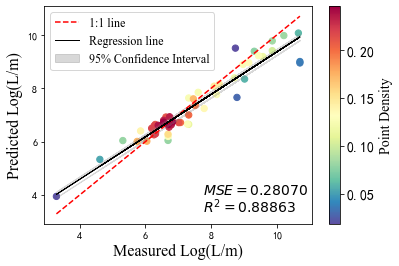

In [87]:
from scipy.stats import gaussian_kde
from statistics import mean
import matplotlib

#test_mse=0.28070
#test_r2=0.88863

def slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b
k, b = slope(y_test_label,final_test_pred)
regression_line = []
for a in y_test_label:
    regression_line.append((k * a) + b)
    
# 样本数量
n = len(y_test_label)
# 95%置信区间对应的z值（样本量大时可直接用1.96）
t_value = 1.96
residuals = final_test_pred - (k * y_test_label + b)
std_dev = np.std(residuals, ddof=1)  # ddof=1 使用无偏估计
std_err = std_dev / np.sqrt(n)
margin_of_error = t_value * std_err
lower_confidence_bound = regression_line - margin_of_error
upper_confidence_bound = regression_line + margin_of_error


xy = np.vstack([y_test_label,final_test_pred])
z = gaussian_kde(xy)(xy)
idx = np.argsort(z)


y_test_label = np.asarray(y_test_label)
final_test_pred = np.asarray(final_test_pred)

y_test_label1, final_test_pred1, z = y_test_label[idx], final_test_pred[idx], z[idx]

fig, ax = plt.subplots()
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14

# 散点密度图
sc = ax.scatter(y_test_label1, final_test_pred1, c=z, s=40, cmap='Spectral_r')

# 自动1:1线
min_val = min(y_test_label1.min(), final_test_pred1.min())
max_val = max(y_test_label1.max(), final_test_pred1.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r', lw=1.5, linestyle='--', label='1:1 line')

# 文字说明
ax.text(min_val + 0.6*(max_val - min_val),
        min_val + 0.1*(max_val - min_val),
        '$MSE=%.5f$' % test_mse,
        family='Times New Roman')

ax.text(min_val + 0.6*(max_val - min_val),
        min_val + 0.01*(max_val - min_val),
        '$R^2=%.5f$' % test_r2,
        family='Times New Roman')

# 回归线与置信区间
ax.plot(y_test_label, regression_line, 'black', lw=1, label='Regression line')
#ax.plot(y_test_label, lower_confidence_bound, linestyle='--', color='black', dashes=(1, 10), label='95% Confidence Interval')
#ax.plot(y_test_label, upper_confidence_bound, linestyle='--', color='black', dashes=(1, 10))
plt.fill_between(
    y_test_label,
    lower_confidence_bound,
    upper_confidence_bound,
    color='gray', alpha=0.3, label='95% Confidence Interval'
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Point Density', family='Times New Roman')

# 坐标轴与标题
ax.set_xlabel("Measured Log(L/m)", fontsize=16, family='Times New Roman')
ax.set_ylabel("Predicted Log(L/m)", fontsize=16, family='Times New Roman')
ax.legend(loc="upper left", prop={'family': 'Times New Roman', 'size': 12})
# ax.set_title("Ensemble Model Scatter Density Plot of Slip Distance",
#              fontsize=14, family='Times New Roman')

# 设置等比例坐标（确保1:1线对齐）
#ax.set_aspect('equal', adjustable='box')

plt.savefig("ensemble_model_scatter_density_plot.png", dpi=300, bbox_inches='tight')
plt.show()

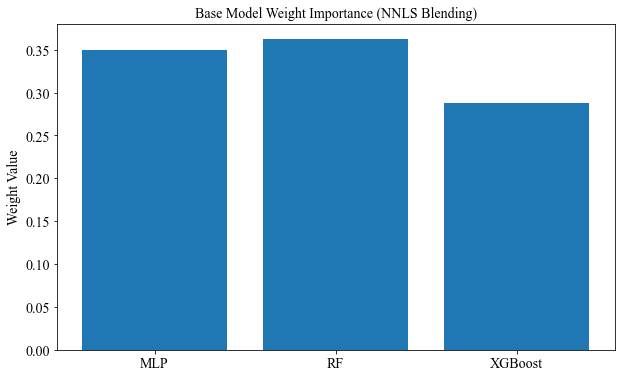

处理模型 0: MLPRegressor
处理模型 1: RandomForestRegressor
处理模型 2: XGBRegressor


In [88]:
import matplotlib.pyplot as plt

# 设置新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

model_objects = [mx, RF, Xgb, svr_model, final_tabnet, final_model]  # 需要保证这6个模型对象存在
selected_names = [model_names[i] for i in top_idx]

plt.figure(figsize=(10, 6))
plt.bar(selected_names, weights)
plt.title("Base Model Weight Importance (NNLS Blending)", fontfamily='Times New Roman', fontsize=14)
plt.ylabel("Weight Value", fontfamily='Times New Roman')
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.savefig('mixed_Base Model Weight Importance.png', dpi=300, bbox_inches='tight')
plt.show()
# ======================
# 计算并融合 SHAP 值
# ======================
# 原始特征名
feature_names = ['H','V']

shap_values_list = []

for i, model in zip(top_idx, [model_objects[i] for i in top_idx]):
    model_type = type(model).__name__
    print(f"处理模型 {i}: {model_type}")
    
    if hasattr(model, "predict"):
        if "Forest" in str(type(model)) or "XGB" in str(type(model)):
            X_df = pd.DataFrame(X_test, columns=feature_names)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer(X_df)
            vals = shap_values.values
            
        elif "TabularModel" in str(type(model)):
            
            try:
                model_features = model.config.continuous_cols + model.config.categorical_cols
            except AttributeError:
                model_features = model.config.data_config.continuous_cols + model.config.data_config.categorical_cols

            X_df_model = pd.DataFrame(X_test, columns=model_features)

            def model_predict(x):
                if not isinstance(x, pd.DataFrame):
                    x = pd.DataFrame(x, columns=model_features)
                return model.predict(x).to_numpy()

            explainer = shap.KernelExplainer(model_predict, X_df_model)
            shap_values = explainer(X_df_model)
            vals = shap_values.values[:, :len(feature_names)]

        else:
            #X_df = pd.DataFrame(X_test, columns=feature_names)
            def model_predict(x):
                return model.predict(x)

            explainer = shap.Explainer(model_predict, X_test)
            shap_values = explainer(X_test)
            vals = shap_values.values

        # ===== 去掉最后一维为1 =====
        vals = np.array(vals)
        if vals.shape[-1] == 1:
            vals = np.squeeze(vals, axis=-1)

        shap_values_list.append(vals)

# 加权融合 SHAP
stacked = np.stack(shap_values_list, axis=0)  # shape = (n_models, n_samples, n_features)
shap_values_ens = np.tensordot(weights, stacked, axes=(0,0))  # result shape (n_samples, n_features)

使用反标准化后的特征进行 SHAP 可视化

=== 2. Feature Impact Summary ===


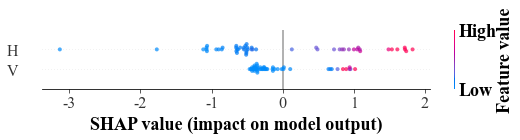


=== 3. Feature Dependence Plots ===
Top features by importance: ['H', 'V']


<Figure size 432x432 with 0 Axes>

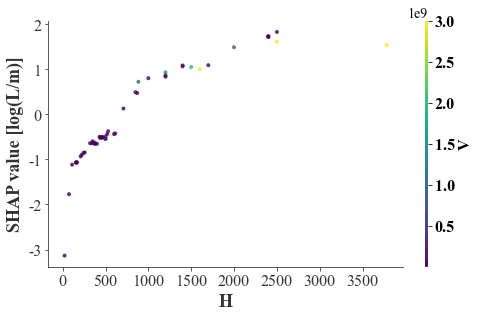

<Figure size 432x432 with 0 Axes>

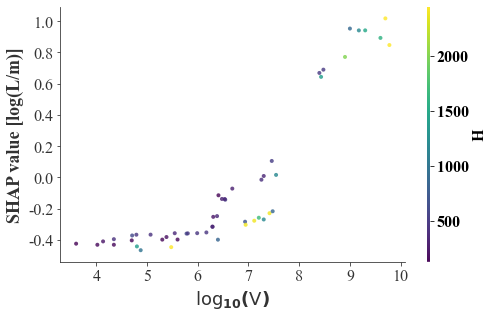

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap


# ======================

# 1. 反标准化（如可行）

# ======================
X_display = scaler.inverse_transform(X_test)
print("使用反标准化后的特征进行 SHAP 可视化")

# 定义特征名及单位（论文中显示用）

feature_names = ['H', 'V']

# 若模型预测 log(y)，则 SHAP 单位为 “log(目标单位)”

target_unit = "log(L/m)"  # 可改为 “m” 或其他实际单位

X_test_df = pd.DataFrame(X_display, columns=feature_names)

# ======================

# 2. 全局特征重要性

# ======================

# print("\n=== 1. Global Feature Importance ===")
# plt.figure(figsize=(8, 5))
# shap.summary_plot(
# shap_values_ens,
# X_display,
# plot_type="bar",
# feature_names=feature_names,
# show=False,
# color_bar=True
# )
# plt.title("Global Feature Importance (SHAP)", fontsize=14, fontweight='bold')
# plt.xlabel(f"Mean(|SHAP value|) [{target_unit}]", fontsize=12)
# plt.tight_layout()
# plt.savefig('mixed_shap_global_importance.png', dpi=300, bbox_inches='tight')
# plt.show()

# ======================

# 3. 特征影响汇总图

# ======================

print("\n=== 2. Feature Impact Summary ===")
plt.figure(figsize=(8,6))

# 绘制 SHAP summary plot
shap.summary_plot(
    shap_values_ens,
    X_display,
    feature_names=feature_names,
    show=False,
    alpha=0.7,
    color_bar=True
)

# 调整 x 轴标签
plt.xlabel("SHAP value (impact on model output)", fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 调整 colorbar 字体和标签
fig = plt.gcf()
cbar_ax = fig.get_axes()[-1]  # summary_plot 的 colorbar 通常是最后一个轴
# 调整刻度字体大小和加粗
cbar_ax.tick_params(labelsize=18)
for tick in cbar_ax.get_yticklabels():
    tick.set_fontweight('bold')
# 调整 colorbar label 字号和加粗
if cbar_ax.yaxis.label is not None:
    cbar_ax.yaxis.label.set_fontsize(18)
    cbar_ax.yaxis.label.set_fontweight('bold')

# 调整边距
plt.tight_layout(pad=2.0)

# 保存高清图片
plt.savefig('mixed_shap_summary_plot.png', dpi=400, bbox_inches='tight')
plt.show()

# ======================

# 4. SHAP 依赖图

# ======================

print("\n=== 3. Feature Dependence Plots ===")
feature_importance = np.mean(np.abs(shap_values_ens), axis=0)
top_features_idx = np.argsort(feature_importance)[::-1]
top_features = [feature_names[i] for i in top_features_idx]
print(f"Top features by importance: {top_features[:4]}")

for feature in top_features[:2]:
    plt.figure(figsize=(6,6))

    # 找到该特征在 feature_names 中的索引
    feature_idx = list(feature_names).index(feature)

    # 取出该列的原始数据
    x_data = X_display[:, feature_idx]
    x_min, x_max = np.nanmin(x_data), np.nanmax(x_data)

    # 判断是否使用对数坐标（跨度超过1000倍）
    use_log = (x_max / max(abs(x_min), 1e-10)) > 10000

    # 拷贝并进行必要的log变换
    X_display_mod = X_display.copy()
    if use_log:
        X_display_mod[:, feature_idx] = np.log10(np.maximum(x_data, 1e-12))
        xlabel = rf'$\mathbf{{\log_{{10}}(\mathrm{{{feature}}})}}$'
    else:
        xlabel = feature

    # 绘制SHAP依赖图
    shap.dependence_plot(
        ind=feature_idx,  # numpy情况下用索引而非字符串名
        shap_values=shap_values_ens,
        features=X_display_mod,
        feature_names=feature_names,
        show=False,
        alpha=0.8,
        cmap="viridis"
    )

    plt.xlabel(xlabel, fontsize=18, fontweight='bold')
    plt.ylabel(f"SHAP value [{target_unit}]", fontsize=18, fontweight='bold')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # 调整colorbar字体
    fig = plt.gcf()
    axes = fig.get_axes()
    if len(axes) > 1:
        cbar_ax = axes[-1]
        cbar_ax.tick_params(labelsize=16)
        for tick in cbar_ax.get_yticklabels():
            tick.set_fontweight('bold')
        if cbar_ax.yaxis.label is not None:
            cbar_ax.yaxis.label.set_fontsize(16)
            cbar_ax.yaxis.label.set_fontweight('bold')

    plt.tight_layout(pad=2.0)
    plt.savefig(f'mixed_shap_dependence_{feature}.png', dpi=400, bbox_inches='tight')
    plt.show()


# ======================

# 5. 特征交互（选做）

# ======================

# print("\n=== 4. Specific Feature Interactions ===")
# special_interactions = [('H', 'V')]
# for feature1, feature2 in special_interactions:
#     if feature1 in feature_names and feature2 in feature_names:
#         plt.figure(figsize=(8, 6))
#         shap.dependence_plot(
#         ind=feature1,
#         shap_values=shap_values_ens,
#         features=X_display,
#         feature_names=feature_names,
#         interaction_index=feature2,
#         show=False,
#         alpha=0.7,
#         cmap="plasma"
#         )
#         #plt.title(f"Interaction: {feature1}-{feature2}", fontsize=14, fontweight='bold')
#         plt.xlabel(f"{feature1}", fontsize=12)
#         plt.ylabel(f"SHAP value [{target_unit}]", fontsize=12)
#         plt.tight_layout()
#         plt.savefig(f'mixed_shap_dependence_{feature1}-vs-{feature2}.png', dpi=300, bbox_inches='tight')
#         plt.show()
